In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import pandasql as ps
from pandasql import sqldf

In [2]:
# Load the dataset
alva_df = pd.read_csv("alva_dataset.csv")

### Exploring data to get familiar with

In [3]:
# Display the shape of the data
alva_df.shape

(41345, 5)

In [4]:
alva_df.describe(include ='all')

,event_id,event_timestamp,page_title,organization_id,user_id
count,41345,41345,41345,41345,41345
unique,41345,41345,4,34,743
top,ajs-44a86fbaa3ea3491b3ded6a1c715ef28,2020-05-13T08:47:00.763Z,Candidate page,b5753677-126d-4aad-8a7f-913210717f24,9a6d6f98-35dc-480a-be28-c92ed739bb03
freq,1,1,15575,4800,2580


In [5]:
# Display the first 5 rows of the data
alva_df.head(5)

,event_id,event_timestamp,page_title,organization_id,user_id
0,ajs-51c205dff7f3f3541943fc69498875cc,2020-01-02T11:47:43.710Z,Welcome,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695
1,ajs-e49668e966f11460a35c70e9cab9edcd,2020-01-02T11:48:07.142Z,Welcome,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695
2,ajs-0aedceadad5d3d4f8ec2367bd4230c39,2020-01-02T11:48:16.099Z,Job position,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695
3,ajs-90802aefaa8f58920c8dfcce19304fad,2020-01-05T16:30:59.842Z,Job position,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695
4,ajs-8354ae15e8bbe83e06efc759737c0932,2020-01-05T16:31:04.477Z,All job positions,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695


### Preparing data for analysis

In [6]:
# For sake of simplicity, replacing long organization_id with shorter and more meaningful names
alva_df['organization_id'] = 'C' + pd.Series(pd.factorize(alva_df['organization_id'])[0] + 1).astype(str)
alva_df.head(10)

,event_id,event_timestamp,page_title,organization_id,user_id
0,ajs-51c205dff7f3f3541943fc69498875cc,2020-01-02T11:47:43.710Z,Welcome,C1,27f92d62-dbaa-4512-8b31-5ef541716695
1,ajs-e49668e966f11460a35c70e9cab9edcd,2020-01-02T11:48:07.142Z,Welcome,C1,27f92d62-dbaa-4512-8b31-5ef541716695
2,ajs-0aedceadad5d3d4f8ec2367bd4230c39,2020-01-02T11:48:16.099Z,Job position,C1,27f92d62-dbaa-4512-8b31-5ef541716695
3,ajs-90802aefaa8f58920c8dfcce19304fad,2020-01-05T16:30:59.842Z,Job position,C1,27f92d62-dbaa-4512-8b31-5ef541716695
4,ajs-8354ae15e8bbe83e06efc759737c0932,2020-01-05T16:31:04.477Z,All job positions,C1,27f92d62-dbaa-4512-8b31-5ef541716695
5,ajs-e13716dfe66d1b3323ac7880dd180589,2020-01-05T16:31:06.761Z,Job position,C1,27f92d62-dbaa-4512-8b31-5ef541716695
6,ajs-0a562f7e6a8f090df2e58ec0b289eead,2020-01-05T16:31:19.695Z,Candidate page,C1,27f92d62-dbaa-4512-8b31-5ef541716695
7,ajs-c161f673e39defc3e23dae41fc952932,2020-01-06T09:32:32.127Z,Job position,C1,27f92d62-dbaa-4512-8b31-5ef541716695
8,ajs-5ccfb6c12f89e46e58463d44e7e46519,2020-01-06T09:32:36.202Z,All job positions,C1,27f92d62-dbaa-4512-8b31-5ef541716695
9,ajs-c7d030e8245aeb246e82f027fd1c657e,2020-01-06T09:32:38.447Z,Job position,C1,27f92d62-dbaa-4512-8b31-5ef541716695


In [7]:
alva_df.describe(include ='all')

,event_id,event_timestamp,page_title,organization_id,user_id
count,41345,41345,41345,41345,41345
unique,41345,41345,4,34,743
top,ajs-44a86fbaa3ea3491b3ded6a1c715ef28,2020-05-13T08:47:00.763Z,Candidate page,C11,9a6d6f98-35dc-480a-be28-c92ed739bb03
freq,1,1,15575,4800,2580


In [8]:
# For sake of simplicity, replacing long user_id with shorter and more meaningful names

alva_df['user_id'] = alva_df['organization_id'] + '-U' + alva_df.groupby('organization_id')['user_id'].transform(lambda x: pd.factorize(x)[0] + 1).astype(str)

In [9]:
alva_df.head()

,event_id,event_timestamp,page_title,organization_id,user_id
0,ajs-51c205dff7f3f3541943fc69498875cc,2020-01-02T11:47:43.710Z,Welcome,C1,C1-U1
1,ajs-e49668e966f11460a35c70e9cab9edcd,2020-01-02T11:48:07.142Z,Welcome,C1,C1-U1
2,ajs-0aedceadad5d3d4f8ec2367bd4230c39,2020-01-02T11:48:16.099Z,Job position,C1,C1-U1
3,ajs-90802aefaa8f58920c8dfcce19304fad,2020-01-05T16:30:59.842Z,Job position,C1,C1-U1
4,ajs-8354ae15e8bbe83e06efc759737c0932,2020-01-05T16:31:04.477Z,All job positions,C1,C1-U1


In [10]:
alva_df.describe(include ='all')

,event_id,event_timestamp,page_title,organization_id,user_id
count,41345,41345,41345,41345,41345
unique,41345,41345,4,34,743
top,ajs-44a86fbaa3ea3491b3ded6a1c715ef28,2020-05-13T08:47:00.763Z,Candidate page,C11,C17-U1
freq,1,1,15575,4800,2580


In [11]:
#Extracting some basic insights
alva_df.dtypes

event_id           object
event_timestamp    object
page_title         object
organization_id    object
user_id            object
dtype: object

In [12]:
alva_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41345 entries, 0 to 41344
Data columns (total 5 columns):
event_id           41345 non-null object
event_timestamp    41345 non-null object
page_title         41345 non-null object
organization_id    41345 non-null object
user_id            41345 non-null object
dtypes: object(5)
memory usage: 1.6+ MB


In [13]:
#Converting "event_timestamp" type from string to datatime
alva_df['event_timestamp'] = pd.to_datetime(alva_df['event_timestamp'])
alva_df.dtypes

event_id                        object
event_timestamp    datetime64[ns, UTC]
page_title                      object
organization_id                 object
user_id                         object
dtype: object

In [14]:
#Extracting month, day, and dates from event_timestamp for further uses
alva_df['month'] = alva_df['event_timestamp'].dt.month
alva_df['day'] = alva_df['event_timestamp'].dt.day
alva_df['date'] = alva_df['event_timestamp'].dt.date

#Converting dates type from string to datatime
alva_df['date'] = pd.to_datetime(alva_df['date'])



In [15]:
alva_df.dtypes

event_id                        object
event_timestamp    datetime64[ns, UTC]
page_title                      object
organization_id                 object
user_id                         object
month                            int64
day                              int64
date                    datetime64[ns]
dtype: object

In [16]:
alva_df.head(7)

,event_id,event_timestamp,page_title,organization_id,user_id,month,day,date
0,ajs-51c205dff7f3f3541943fc69498875cc,2020-01-02 11:47:43.710000+00:00,Welcome,C1,C1-U1,1,2,2020-01-02
1,ajs-e49668e966f11460a35c70e9cab9edcd,2020-01-02 11:48:07.142000+00:00,Welcome,C1,C1-U1,1,2,2020-01-02
2,ajs-0aedceadad5d3d4f8ec2367bd4230c39,2020-01-02 11:48:16.099000+00:00,Job position,C1,C1-U1,1,2,2020-01-02
3,ajs-90802aefaa8f58920c8dfcce19304fad,2020-01-05 16:30:59.842000+00:00,Job position,C1,C1-U1,1,5,2020-01-05
4,ajs-8354ae15e8bbe83e06efc759737c0932,2020-01-05 16:31:04.477000+00:00,All job positions,C1,C1-U1,1,5,2020-01-05
5,ajs-e13716dfe66d1b3323ac7880dd180589,2020-01-05 16:31:06.761000+00:00,Job position,C1,C1-U1,1,5,2020-01-05
6,ajs-0a562f7e6a8f090df2e58ec0b289eead,2020-01-05 16:31:19.695000+00:00,Candidate page,C1,C1-U1,1,5,2020-01-05


In [17]:
alva_df.describe(include ='all')

,event_id,event_timestamp,page_title,organization_id,user_id,month,day,date
count,41345,41345,41345,41345,41345,41345.000000,41345.000000,41345
unique,41345,41345,4,34,743,NaN,NaN,353
top,ajs-44a86fbaa3ea3491b3ded6a1c715ef28,2020-11-02 09:31:27.010000+00:00,Candidate page,C11,C17-U1,NaN,NaN,2020-10-26 00:00:00
freq,1,1,15575,4800,2580,NaN,NaN,498
first,NaN,2020-01-02 11:47:43.710000+00:00,NaN,NaN,NaN,NaN,NaN,2020-01-02 00:00:00
last,NaN,2020-12-31 12:13:04.299000+00:00,NaN,NaN,NaN,NaN,NaN,2020-12-31 00:00:00
mean,NaN,NaN,NaN,NaN,NaN,7.829895,15.509106,NaN
std,NaN,NaN,NaN,NaN,NaN,3.305070,8.797017,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,5.000000,8.000000,NaN


### Installing pandasql to use SQL in pandas

In [18]:
#pip install pandasql

In [45]:
#Calculating engagement rate based on customer login
#Combining two columns ['organization_id'] + ['date'] as a new column to prevent wrong result using group by due to some intersections 
alva_df['cdate'] = alva_df['organization_id'] + alva_df['date'].astype(str)

org_active=sqldf("select organization_id, cdate, event_timestamp from alva_df group by cdate order by organization_id ASC")

org_active_days=sqldf("select organization_id, min(event_timestamp) as first_date, max(event_timestamp) as last_date, count(organization_id) as active_days from org_active group by organization_id")

#calculating first date of login and last date of login for each customer
org_active_days['last_date'] = pd.to_datetime(org_active_days['last_date'])
org_active_days['first_date'] = pd.to_datetime(org_active_days['first_date'])

#calculating membership days from subtracting last date of login and first date of login
org_active_days['membership_days'] = (org_active_days['last_date'] - org_active_days['first_date']).dt.days

#calculating engagement rate1 by dividing active_days and membership_days
org_active_days['engagement_p1'] = (org_active_days['active_days'] / org_active_days['membership_days'])

#The desired engagement_rate is 1 and the more closer to 1 the better

org_active_days.head(35)

,organization_id,first_date,last_date,active_days,membership_days,engagement_p1
0,C1,2020-01-02 11:47:43.710,2020-12-15 07:42:47.671,196,347,0.564841
1,C10,2020-03-31 06:31:23.842,2020-12-31 10:10:19.744,175,275,0.636364
2,C11,2020-04-01 06:30:03.469,2020-12-30 08:16:38.313,209,273,0.765568
3,C12,2020-04-01 06:48:18.661,2020-12-22 15:18:56.558,121,265,0.456604
4,C13,2020-04-02 08:57:09.506,2020-12-23 08:30:38.589,144,264,0.545455
5,C14,2020-04-14 15:44:46.547,2020-12-31 07:58:27.638,156,260,0.600000
6,C15,2020-05-06 07:47:06.886,2020-12-21 14:07:23.896,82,229,0.358079
7,C16,2020-05-27 09:19:14.987,2020-12-21 13:07:36.639,47,208,0.225962
8,C17,2020-06-01 07:08:21.876,2020-12-22 08:18:05.624,137,204,0.671569
9,C18,2020-06-16 09:23:50.754,2020-12-28 12:31:08.799,68,195,0.348718


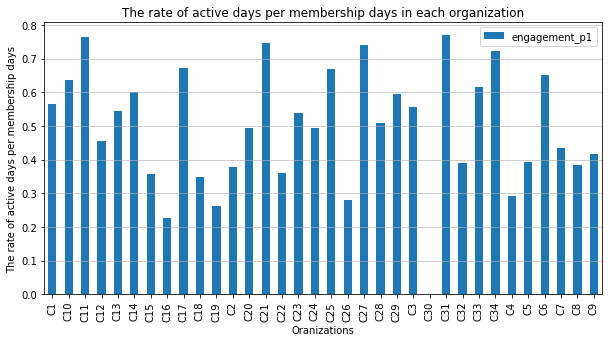

In [53]:
#Plotting the rate of active days per membership days in each organization- no7

org_active_days.plot(x='organization_id', y='engagement_p1', kind="bar", figsize=(10,5))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Oranizations')
plt.ylabel('The rate of active days per membership days')
plt.xticks(np.arange(34), org_active_days['organization_id'])
plt.title('The rate of active days per membership days in each organization')
plt.show()

Based on the above information, the C5 organization has not logged in to the App for 5 months and this customer is at the risk to churn. There is another concern about the C30 customer. This customer only logged in on December 1st and never logged in again for the entire month.

In [20]:
#Finding the number of views per organization
org_view = sqldf("select organization_id, count(event_id) as number_of_views from alva_df group by organization_id order by 2 DESC")
org_view.head(34)

,organization_id,number_of_views
0,C11,4800
1,C10,4421
2,C17,4126
3,C3,2981
4,C14,2058
5,C6,1912
6,C1,1883
7,C27,1849
8,C7,1826
9,C25,1746


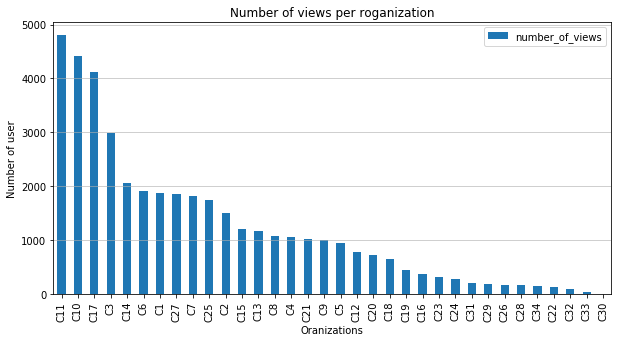

In [21]:
#plotting the number of views per roganization and find out the most/least active organization-no1
org_view.plot(kind="bar", figsize=(10,5))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Oranizations')
plt.ylabel('Number of user')
plt.xticks(np.arange(34), org_view['organization_id'])
plt.title('Number of views per roganization')
plt.show()

In [22]:
#Finding top 10 most active users
user_view = sqldf("select user_id, count(event_id) as number_of_views from alva_df group by user_id order by 2 DESC limit 10")
user_view.head(10)

,user_id,number_of_views
0,C17-U1,2580
1,C11-U4,1877
2,C10-U2,968
3,C21-U1,965
4,C27-U1,904
5,C25-U1,900
6,C15-U1,842
7,C11-U1,837
8,C2-U1,795
9,C3-U50,728


In [23]:
#Finding top 10 least active users
user_view2 = sqldf("select user_id, count(event_id) as number_of_views from alva_df group by user_id order by 2 ASC limit 10")
user_view2.head(10)

,user_id,number_of_views
0,C1-U7,1
1,C12-U5,1
2,C14-U36,1
3,C14-U37,1
4,C14-U40,1
5,C14-U48,1
6,C15-U13,1
7,C15-U9,1
8,C16-U3,1
9,C17-U16,1


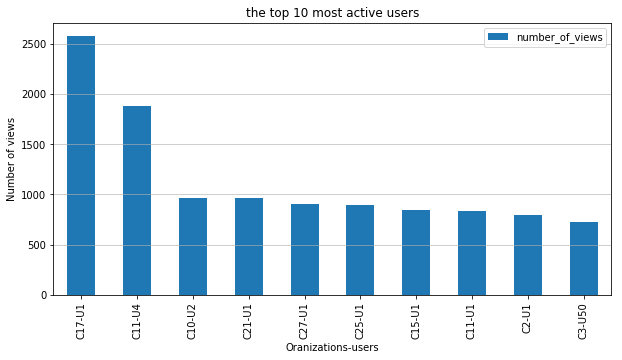

In [62]:
#plotting top 10 most active users-no2
user_view.plot(kind="bar", figsize=(10,5))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Oranizations-users')
plt.ylabel('Number of views')
plt.xticks(np.arange(10), user_view['user_id'])
plt.title('the top 10 most active users')
plt.show()

In [25]:
#finding the number of users per organization
org_user=sqldf("select organization_id, count(distinct user_id) as num_user from alva_df group by organization_id order by 2 DESC")
org_user.head(5)

,organization_id,num_user
0,C3,167
1,C9,167
2,C14,48
3,C7,26
4,C10,25


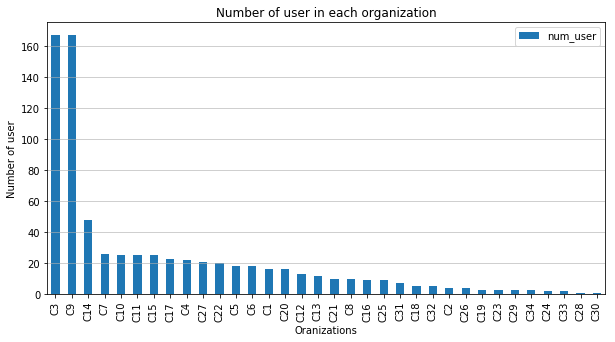

In [26]:
#Plotting the number of users per organization-no3
org_user.plot(kind="bar", figsize=(10,5))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Oranizations')
plt.ylabel('Number of user')
plt.xticks(np.arange(34), org_user['organization_id'])
plt.title('Number of user in each organization')
plt.show()

In [27]:
#finding the number of views per page
page_views=sqldf("select page_title, count(distinct event_id) as num_views from alva_df group by page_title order by 2 DESC")
page_views.head(50)

,page_title,num_views
0,Candidate page,15575
1,Job position,12620
2,Welcome,10718
3,All job positions,2432


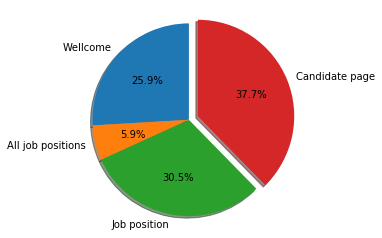

In [28]:
# plotting the number of views per page-no4
labels = 'Wellcome', 'All job positions', 'Job position', 'Candidate page'
sizes = [10718, 2432, 12620, 15575]
explode = (0, 0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()


In [29]:
#finding the number of user and the number of views per organization
org_user_view=sqldf("select organization_id, min(event_timestamp) as first_date, max(event_timestamp) as last_date, count(distinct user_id) as num_user, count(*) as views from alva_df group by organization_id order by 3 DESC")
org_user_view.head(10)

,organization_id,first_date,last_date,num_user,views
0,C14,2020-04-14 15:44:46.547000,2020-12-31 12:13:04.299000,48,2058
1,C10,2020-03-31 06:31:23.842000,2020-12-31 10:10:19.744000,25,4421
2,C9,2020-02-20 11:54:01.688000,2020-12-31 00:28:36.002000,167,1004
3,C29,2020-11-18 15:04:10.513000,2020-12-30 20:34:32.005000,3,186
4,C7,2020-01-28 21:00:35.478000,2020-12-30 14:20:33.012000,26,1826
5,C11,2020-04-01 06:30:03.469000,2020-12-30 14:16:40.118000,25,4800
6,C34,2020-12-11 14:06:41.590000,2020-12-30 13:34:23.164000,3,153
7,C3,2020-01-09 08:12:10.180000,2020-12-30 13:25:57.124000,167,2981
8,C27,2020-11-02 07:45:25.563000,2020-12-30 12:48:12.169000,21,1849
9,C6,2020-01-27 13:13:04.026000,2020-12-30 12:02:33.287000,18,1912


In [44]:
#calculating two other engagement parameters: views/num_user and views/membership_days

#calculating first date of login and last date of login for each customer
org_user_view['last_date'] = pd.to_datetime(org_user_view['last_date'])
org_user_view['first_date'] = pd.to_datetime(org_user_view['first_date'])

#calculating membership days from subtracting last date of login and first date of login
org_user_view['membership_days'] = (org_user_view['last_date'] - org_user_view['first_date']).dt.days


engagment_views=sqldf("select organization_id, num_user, views, membership_days, views/num_user, views/membership_days from org_user_view group by organization_id order by 4 DESC")
engagment_views.head(50)

,organization_id,num_user,views,membership_days,views/num_user,views/membership_days
0,C3,167,2981,356,17,8.0
1,C1,16,1883,347,117,5.0
2,C2,4,1505,342,376,4.0
3,C4,22,1059,338,48,3.0
4,C6,18,1912,337,106,5.0
5,C7,26,1826,336,70,5.0
6,C8,10,1071,321,107,3.0
7,C9,167,1004,314,6,3.0
8,C10,25,4421,275,176,16.0
9,C11,25,4800,273,192,17.0


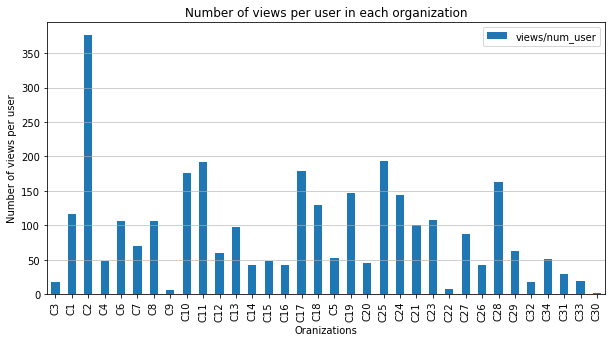

In [51]:
#Plotting the number of views per user in each organization- no5

engagment_views.plot(x='organization_id', y='views/num_user', kind="bar", figsize=(10,5))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Oranizations')
plt.ylabel('Number of views per user')
plt.xticks(np.arange(34), engagment_views['organization_id'])
plt.title('Number of views per user in each organization')
plt.show()

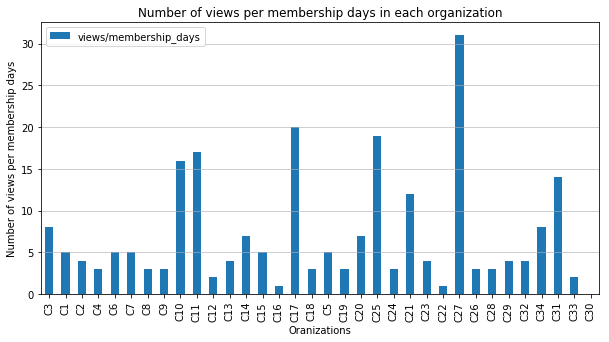

In [52]:
#Plotting the number of views per membership days user in each organization- no6

engagment_views.plot(x='organization_id', y='views/membership_days', kind="bar", figsize=(10,5))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Oranizations')
plt.ylabel('Number of views per membership days')
plt.xticks(np.arange(34), engagment_views['organization_id'])
plt.title('Number of views per membership days in each organization')
plt.show()

In [55]:
#Finding the number of viewing pages per Month
output5 = sqldf("select month, count(*) as views from alva_df group by month order by 1 ASC")

output5.head(12)

,month,views
0,1,1721
1,2,1835
2,3,1794
3,4,2923
4,5,2979
5,6,3958
6,7,1824
7,8,2795
8,9,4277
9,10,5666


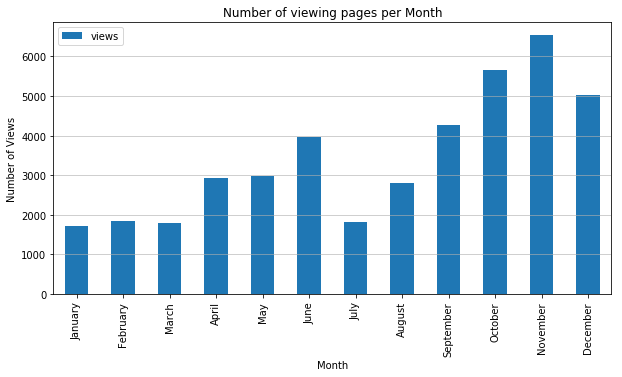

In [59]:
#Plotting the number of viewing pages per Month-no8
output5.plot(x='month', y='views', kind="bar", figsize=(10,5))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Month')
plt.ylabel('Number of Views')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Number of viewing pages per Month')
plt.show()

In [33]:
#Finding the most active days in 2020
output4 = sqldf("select cdate, max(freq) from (select cdate, count(*) as freq from alva_df group by cdate order by 2 ASC)")
output4.head(5)

,cdate,max(freq)
0,C32020-05-13,238


In [35]:
#finding the number of customers per month based on their activity
month_customers = sqldf("select number_of_customers from (select month, count(distinct organization_id) as number_of_customers from alva_df group by month)")
month_customers2 = sqldf("select month, count(distinct organization_id) as number_of_customers from alva_df group by month")

month_customers2.head(12)

,month,number_of_customers
0,1,7
1,2,9
2,3,10
3,4,14
4,5,16
5,6,18
6,7,17
7,8,17
8,9,20
9,10,23


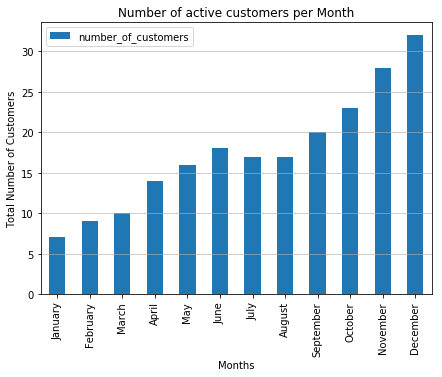

In [36]:
# Plotting Number of active customers per Month based on their logged on in the app-no9
month_customers.plot(kind="bar", figsize=(7,5))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Months')
plt.ylabel('Total Number of Customers')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Number of active customers per Month')
plt.show()

In [43]:
# Finding the Earliest/latest date and subscription lenght for each user that he/she was logged in the app
dates_log=sqldf("SELECT organization_id, min(event_timestamp), max(event_timestamp), min(month) as First_Login ,max(month) as Last_Login, (max(month)- min(month)) as membership_month FROM alva_df group by organization_id order by 2")
dates_log.head(34)

,organization_id,min(event_timestamp),max(event_timestamp),First_Login,Last_Login,membership_month
0,C1,2020-01-02 11:47:43.710000,2020-12-15 07:42:47.671000,1,12,11
1,C2,2020-01-08 14:18:49.630000,2020-12-16 11:28:58.155000,1,12,11
2,C3,2020-01-09 08:12:10.180000,2020-12-30 13:25:57.124000,1,12,11
3,C4,2020-01-14 19:32:51.668000,2020-12-18 13:25:55.751000,1,12,11
4,C5,2020-01-17 12:38:36.783000,2020-07-02 13:57:48.236000,1,7,6
5,C6,2020-01-27 13:13:04.026000,2020-12-30 12:02:33.287000,1,12,11
6,C7,2020-01-28 21:00:35.478000,2020-12-30 14:20:33.012000,1,12,11
7,C8,2020-02-05 13:06:31.842000,2020-12-22 13:57:32.394000,2,12,10
8,C9,2020-02-20 11:54:01.688000,2020-12-31 00:28:36.002000,2,12,10
9,C10,2020-03-31 06:31:23.842000,2020-12-31 10:10:19.744000,3,12,9


In [41]:
# Finding the number of acquiring new customers per month
new_cust=sqldf("SELECT First_Login as month, Count(organization_id) as number_of_new_custoers  FROM dates_log group by First_Login ")
new_cust2=sqldf("SELECT Count(organization_id) as number_of_new_custoers  FROM dates_log group by First_Login ")

new_cust.head(12)

,month,number_of_new_custoers
0,1,7
1,2,2
2,3,1
3,4,4
4,5,2
5,6,2
6,8,1
7,9,3
8,10,4
9,11,3


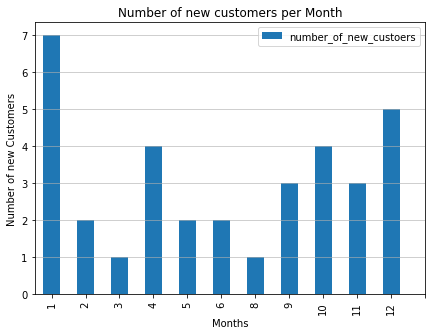

In [42]:
# Plotting the number of new customers per Month based on their login in the app-c10

new_cust2.plot(kind="bar", figsize=(7,5))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Months')
plt.ylabel('Number of new Customers')
plt.xticks(np.arange(12), new_cust['month'])
plt.title('Number of new customers per Month')
plt.show()

### What about the retention rate

Let’s assume we had 18 customers at the beginning of July (based on the data) and one of our customers (C5) has churned. Now, we want to calculate Retention rate at the end of August. And let’s assume we have 3 different plan like these: Starter 2500 Kr/month, Pro 10000 Kr/month, and Enterprise 20000 Kr/month.

The most important thing is to look at the two types of retention: 1- Customer Retention and 2- MRR (Monthly Recurring Revenue) Retention.

For instance, you may see 1 (C5) of your 18 Customers churn — that's a 5.6% customer churn rate, or a 94.4% customer retention rate.

| Total customers | customer churn | churn rate | retention rate |
| --- | --- | --- | --- |
| 18 | 1 | 5.6% | 94.4% |


If that customer (C5) was on the starter plan and paid 2500kr/month, that's 2500kr in MRR Churn for that month. If the MRR at the beginning of the previous month was 135000kr (25000 kr from 10 Starter plan customers paying 2500/month, 50000 kr from 5 Pro plan customers paying 10000/month, and 60000 kr from 3 enterprise customers paying 20000/month), your MRR churn rate is 1.8% and your MRR retention rate is 98.2%.


| Total customers | customer churn | MRR churn rate | MRR retention rate |
| --- | --- | --- | --- |
| 18 | 1 | 1.8% | 98.2% |



Now let's imagine that if instead of seeing 1 of your Starter customers churn, you had seen 1 of your Enterprise customers churn. By losing 1 Enterprise customers, your MRR churn for that month is 20000 kr. That's an 14.8% MRR churn rate and 85.2% MRR retention rate.

| Total customers | customer churn | MRR churn rate | MRR retention rate |
| --- | --- | --- | --- |
| 18 | 1 | 14.8% | 85.2% |

Though the difference between a 98.2% and an 85.2% MRR retention rate sound significant, and things are getting worse over the course of 12 months.